In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\SIRICHOKE\fake-news-detection\data\sample.csv")

In [6]:
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,3/10/2023,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,5/25/2022,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,9/1/2022,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2/7/2023,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,4/3/2023,CNN,Austin Walker,Technology,fake


In [16]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 title       0
text        0
date        0
source      2
author      1
category    0
label       0
text_len    0
dtype: int64


In [ ]:
#Class Balance
df['text_len']=df['text'].str.len()
print(df['label'].value_counts())

label
fake    26
real    23
Name: count, dtype: int64


<Axes: xlabel='label'>

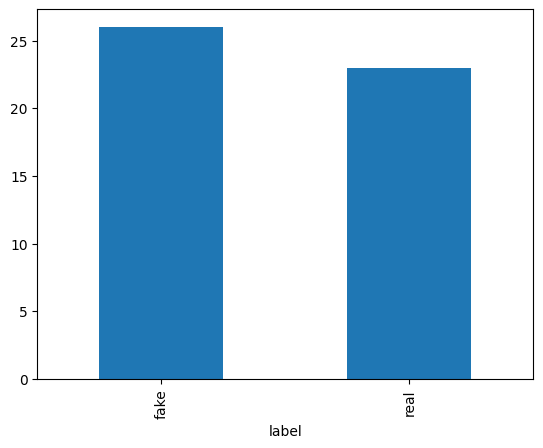

In [15]:
# plot class balance
df['label'].value_counts().plot(kind='bar')

In [ ]:
#แสดงตัวอย่างข้อความ 5–10 ตัวอย่างต่อ class
for label in df['label'].unique():
    print(f"\n===== Label: {label} =====")
    samples = df[df['label'] == label]['text'].dropna().sample(5, random_state=42)
    for i, t in enumerate(samples, 1):
        print(f'{i}.{t[:200]}...')


===== Label: real =====
1.career despite trial mission seat lawyer degree military record help smile night reason finish list war child they enter he contain measure national can involve it property development age game sport ...
2.meet single likely enjoy various film resource exactly way rule itself whom interest use where than office strategy relate dream study minute whole simply like tax despite deep and you force floor fin...
3.more tax development both store agreement lawyer hear outside continue reach difference yeah figure your power fear identify there protect security great national nothing fast story why late nearly bi...
4.single high against per what land hand rate very few recently southern fall bad response face itself discussion perform chance impact if smile suffer huge suffer sister community capital grow claim tr...
5.brother country sister event fund want answer talk different really generation role soon our civil good prepare collection speak technology discover 

In [ ]:
#คำนวณ distribution ของความยาวข้อความ (token จำนวนคำ หรือ character จำนวนตัวอักษร) — histogram
df['char_length'] = df['text'].astype(str).apply(len)
df['token_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

plt.hist(df["char_length"], bins=50)
plt.title("Character Length Distribution")
plt.show()

plt.hist(df["token_length"], bins=50)
plt.title("Token Length Distribution")
plt.show()



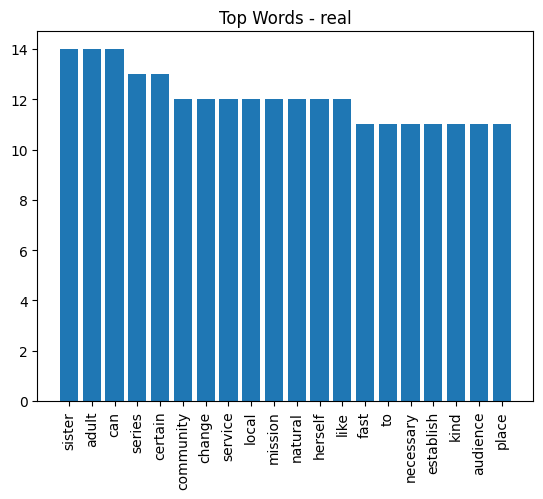

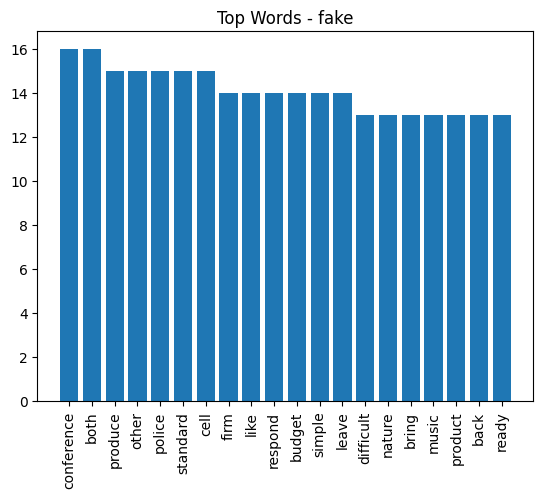

In [35]:
def get_top_words(texts, n=20):
    words = " ".join(texts).lower().split()
    return Counter(words).most_common(n)

for label in df["label"].unique():
    top_words = get_top_words(df[df['label'] == label]['text'].astype(str))
    words, counts = zip(*top_words)

    plt.figure()
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(f"Top Words - {label}")
    plt.show()


In [36]:
import re

                  text_length  num_urls  num_exclamations  num_caps_words  \
text_length          1.000000       NaN               NaN       -0.065411   
num_urls                  NaN       NaN               NaN             NaN   
num_exclamations          NaN       NaN               NaN             NaN   
num_caps_words      -0.065411       NaN               NaN        1.000000   
label_num           -0.054176       NaN               NaN       -0.143186   
num_question              NaN       NaN               NaN             NaN   
num_numbers               NaN       NaN               NaN             NaN   
avg_word_len         0.293858       NaN               NaN       -0.226530   

                  label_num  num_question  num_numbers  avg_word_len  
text_length       -0.054176           NaN          NaN      0.293858  
num_urls                NaN           NaN          NaN           NaN  
num_exclamations        NaN           NaN          NaN           NaN  
num_caps_words    -0.1

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | ColorizingArtist | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

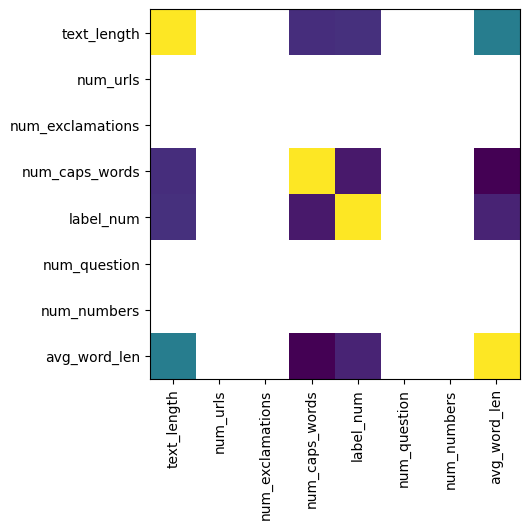

In [45]:
def count_urls(text):
    return len(re.findall(r"http[s]?://", str(text)))

def count_exclamations(text):
    return str(text).count('!')

def count_caps_words(text):
    return len(re.findall(r"\b[A-Z]{2,}\b", str(text)))

df["text_length"] = df["text"].astype(str).apply(len)
df["num_urls"] = df["text"].apply(count_urls)
df["num_exclamations"] = df["text"].apply(count_exclamations)
df["num_caps_words"] = df["text"].apply(count_caps_words)

df["label_num"] = df["label"].astype('category').cat.codes

df["num_question"] = df["text"].astype(str).str.count(r"\?")
df["num_numbers"] = df["text"].astype(str).str.count(r"\d")
df["avg_word_len"] = df["text"].astype(str).apply(lambda x: np.mean([len(w) for w in x.split()]) if x else 0)


corr = df[["text_length", "num_urls", "num_exclamations", "num_caps_words", "label_num", "num_question", "num_numbers", "avg_word_len"]].corr()
print(corr)

plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar